In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/



In [0]:
! kaggle competitions download -c 'aptos2019-blindness-detection'

100% 8.00G/8.01G [01:28<00:00, 58.8MB/s]
100% 8.01G/8.01G [01:28<00:00, 96.9MB/s]
100% 1.50G/1.50G [00:15<00:00, 107MB/s] 
100% 1.50G/1.50G [00:15<00:00, 107MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 51.8MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 22.2MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 29.9MB/s]


In [0]:
! mkdir train

In [0]:
! unzip train_images.zip -d train

Archive:  train_images.zip
  inflating: train/7b9d519cbd66.png  
  inflating: train/ae49cc60f251.png  
  inflating: train/b294927b14b0.png  
  inflating: train/f4d3777f2710.png  
  inflating: train/d74ccc796517.png  
  inflating: train/15bed5adde74.png  
  inflating: train/f002ce614c59.png  
  inflating: train/7335a2d43ada.png  
  inflating: train/9b7b6e4db1d5.png  
  inflating: train/1968183f0e61.png  
  inflating: train/d91273efb92a.png  
  inflating: train/5cf9127f251a.png  
  inflating: train/370f575adb23.png  
  inflating: train/4c17e85686f0.png  
  inflating: train/4f7755e74a9e.png  
  inflating: train/25e9fd872182.png  
  inflating: train/b64e1eef3d63.png  
  inflating: train/e7d2c2c3b30f.png  
  inflating: train/bfda2fd0533a.png  
  inflating: train/224bb938e2dd.png  
  inflating: train/d51e5d7484ea.png  
  inflating: train/dc6fa1b38b83.png  
  inflating: train/74898f372d2b.png  
  inflating: train/152db3de8120.png  
  inflating: train/07929d32b5b3.png  
  inflating: train/0773

In [0]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator




1.14.0


Using TensorFlow backend.


In [0]:
import copy
import random
import cv2
from keras.applications import VGG16, VGG19, InceptionV3, Xception
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np


In [0]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.losses import categorical_crossentropy
from keras.models import Model, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os

In [0]:
import os
blnd_img=list()
for file in os.listdir("/content/train"):
    #if file.endswith(".jpg"):
      #print(1)

        #print(os.path.join('/content/jpg', file))
        img=blnd_img.append(os.path.join("/content/train",file))
        #print(blnd_img)
blnd_df = pd.DataFrame(blnd_img)
blnd_df['colFromIndex'] = blnd_df.index
blnd_df = blnd_df.sort_values([0, 'colFromIndex'])
blnd_df=blnd_df.reset_index()
len(blnd_df)
label_dataframe = pd.read_csv('/content/train.csv')
label_dataframe.head()



,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [0]:
#from keras.preprocessing.image import img_to_array
i=0
import cv2
import numpy as np
while i<len(blnd_df[0]):
  a=cv2.imread(blnd_df[0][i])
  a=cv2.resize(a,(256,256))
  #a=img_to_array(a)
  #a=np.expand_dims(a,axis=0) 
  #a=a[np.newaxis,:,:]
  #a = a.reshape((1,) + a.shape)
  blnd_df[0][i]=a
  print(i)
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
blnd_df[1]=label_dataframe['id_code']
blnd_df[2]=label_dataframe['diagnosis']
print(blnd_df.head(5))
print(blnd_df.tail(5))

   index                                                  0  ...             1  2
0   2534  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [1, 1, 1], ...  ...  000c1434d8d7  2
1   2918  [[[2, 1, 3], [1, 0, 2], [1, 0, 2], [2, 1, 3], ...  ...  001639a390f0  4
2    792  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...  ...  0024cdab0c1e  1
3    433  [[[0, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], ...  ...  002c21358ce6  0
4   3051  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ...  005b95c28852  0

[5 rows x 5 columns]
      index                                                  0  ...             1  2
3657   2461  [[[0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...  ...  ffa47f6a7bf4  2
3658   3443  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ...  ffc04fed30e6  0
3659    259  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...  ...  ffcf7b45f213  2
3660   2913  [[[0, 1, 2], [0, 1, 2], [2, 4, 5], [1, 3, 4], ...  ...  ffd97f8cd5aa  0
3661   2672  [[[6, 4, 4], [6, 3, 5], [6, 4, 4], [6, 4, 4], ..

In [0]:
from sklearn.model_selection import train_test_split #  train,test = train_test_split(dataset,test_size=0.20,stratify=True)
train_img_blnd, test_img_blnd, train_label_blnd, test_label_blnd = train_test_split(blnd_df[0], blnd_df[2], test_size=0.2,stratify=blnd_df[2])
train=np.save('/content/train', np.stack(train_img_blnd,axis=0))
test=np.save('/content/test', np.stack(test_img_blnd,axis=0))

In [0]:
train_img_blnd=np.load('/content/train.npy')
test_img_blnd = np.load('/content/test.npy')
train_img_blnd.shape

(2929, 256, 256, 3)

In [0]:
train_img_blnd=train_img_blnd.astype('float32')/255
test_img_blnd=test_img_blnd.astype('float32')/255

In [0]:
train_label_blnd=train_label_blnd.astype('category')
dummies_train= pd.get_dummies(train_label_blnd)
dummies_train.head()
test_label_blnd=test_label_blnd.astype('category')
dummies_test= pd.get_dummies(test_label_blnd)
dummies_test.head()

,0,1,2,3,4
2254,0,1,0,0,0
1124,0,1,0,0,0
3023,0,0,1,0,0
1594,0,0,0,0,1
363,1,0,0,0,0


#vgg19

In [0]:
    vgg19_model = VGG19(weights='imagenet', include_top=False,input_shape=(256, 256, 3))
    x = vgg19_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)

    predictions = Dense(5, activation='softmax')(x)

    model = Model(inputs=vgg19_model.input, outputs=predictions)
    for layer in vgg19_model.layers:
       layer.trainable = False

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
    model.fit(train_img_blnd, dummies_train)

    for i, layer in enumerate(model.layers):

        if i < 14:
            layer.trainable = False
        else:
            layer.trainable = True

    model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
  
  

Epoch 1/1
2929/2929 [==============================] - 39s 13ms/step - loss: 1.0846


In [0]:
  history_vgg19 = model.fit(train_img_blnd, dummies_train,  epochs=70, validation_data=(test_img_blnd, dummies_test))

Train on 2929 samples, validate on 733 samples
Epoch 1/70
2929/2929 [==============================] - 61s 21ms/step - loss: 0.8640 - acc: 0.6989 - val_loss: 0.8083 - val_acc: 0.7176
Epoch 2/70
2929/2929 [==============================] - 58s 20ms/step - loss: 0.8092 - acc: 0.7153 - val_loss: 0.7721 - val_acc: 0.7217
Epoch 3/70
2929/2929 [==============================] - 58s 20ms/step - loss: 0.7794 - acc: 0.7231 - val_loss: 0.7599 - val_acc: 0.7162
Epoch 4/70
2929/2929 [==============================] - 58s 20ms/step - loss: 0.7661 - acc: 0.7177 - val_loss: 0.7269 - val_acc: 0.7285
Epoch 5/70
2929/2929 [==============================] - 58s 20ms/step - loss: 0.7468 - acc: 0.7224 - val_loss: 0.7299 - val_acc: 0.7271
Epoch 6/70
2929/2929 [==============================] - 58s 20ms/step - loss: 0.7213 - acc: 0.7299 - val_loss: 0.6989 - val_acc: 0.7285
Epoch 7/70
2929/2929 [==============================] - 58s 20ms/step - loss: 0.7135 - acc: 0.7347 - val_loss: 0.6712 - val_acc: 0.7531
E

In [0]:
model.save("vgg19_82%.h5")

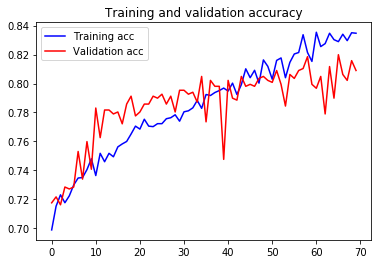

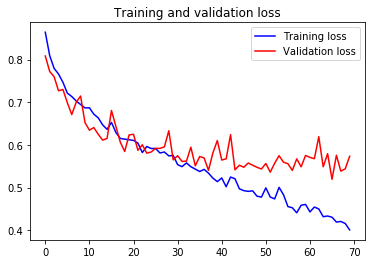

In [0]:
acc = history_vgg19.history['acc']
val_acc = history_vgg19.history['val_acc']
loss = history_vgg19.history['loss']
val_loss = history_vgg19.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

#vgg19_latest

In [0]:
from sklearn.metrics import classification_report
import numpy as np

y_proba = model.predict(test_img_blnd)
y_classes = y_proba.argmax(axis=-1)
#y_classes = keras.np_utils.probas_to_classes(y_proba)

In [0]:
y_classes

array([2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 2, 4, 2, 4, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 3, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 3, 0, 2, 0, 2, 0, 1, 1, 0, 4, 0, 0,
       0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 1, 4, 0, 2, 0, 2, 2, 2, 0, 3,
       0, 2, 2, 2, 2, 2, 4, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1,
       0, 4, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 4, 2, 0, 2, 0, 1, 3,
       0, 0, 0, 2, 0, 2, 0, 2, 4, 2, 4, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0,

In [0]:
 from mlxtend.evaluate import confusion_matrix

#y_target =    [1, 1, 1, 0, 0, 2, 0, 3]
#y_predicted = [1, 0, 1, 0, 0, 2, 1, 3]
cm = confusion_matrix(y_target=test_label_blnd, 
                      y_predicted=y_classes, 
                      binary=False)
cm

array([[358,   3,   0,   0,   0],
       [  7,  45,  20,   0,   2],
       [  9,  12, 171,   4,   4],
       [  0,   3,  32,   3,   1],
       [  4,   4,  33,   2,  16]])

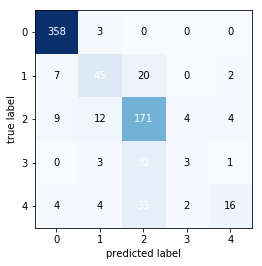

In [0]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()